## Building a Logistic regression

## imports the libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [3]:
raw_data = pd.read_csv('2.01. Admittance.csv')

In [4]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [5]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0 })

In [6]:
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### Declare the dependent and independent variables

In [10]:
y = data['Admitted']
x1 = data['SAT']

### logistic regression

In [12]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


### Summary

In [13]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Feb 2020   Pseudo R-squ.:                  0.7992
Time:                        20:26:45   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

MLE = maximum likelihood estimation (MLE) <br>
log-likelihood - its value is amost but not always negative. <br>
LL-Null - log likelihood-null <br>
the log-liklihood of a model which has no independent variables. y = b0 *1<br>
LLR(log likelihood ratio) p-value: measures if our model is statistically different from LL-null, a.k.a. a useless model <br>
pseudo R-squared: a good pseudo R-squared is somewhere between 0.2 and 0.4. this measure is mostly useful for comparing varistions of the same model. Different models will have completely different and imcomplarable Pseudo R-squred!


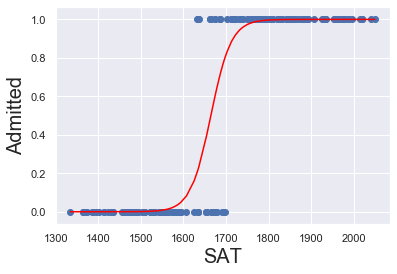

In [14]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='red')
plt.show()

### Logistic Regression Assumptions 
The logistic regress predicts the probability of an event occuring